使用随机森林模型对波士顿房价数据集进行回归建模，包括网格搜索交叉验证寻找最佳参数、决策树基模型可视化、特征重要度分析、预测结果可视化。

# 随机森林模型

![](./img/2.png)

![](./img/3.png)

![](./img/4.png)

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
housing_data = pd.read_csv('boston_house_price_english.csv')
X =  housing_data.drop(["MEDV"],axis = 1)
y = housing_data["MEDV"]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
# 从python机器学习与数据挖掘工具库sklearn中导入随机森林回归器
from sklearn.ensemble import RandomForestRegressor

# 导入网格搜索交叉验证，网格搜索可以让模型参数按我们给定的列表遍历，找到效果最好的模型
# 交叉验证可以充分评估回归模型的准确性
from sklearn.model_selection import GridSearchCV

# 构造参数字典，我们让这三个参数按列表中的顺序排列组合遍历一遍
param_grid = {
    'n_estimators':[5,10,20,50,100,200], # 决策树的个数
    'max_depth':[3,5,7], # 最大树深，树太深会造成过拟合
    'max_features':[0.6,0.7,0.8,1] # 决策划分时考虑的最大特征数
}

# 实例化随机森林回归器
rf = RandomForestRegressor()

# 以随机森林回归器为基础构造网格搜索回归器
grid = GridSearchCV(rf, param_grid=param_grid, cv=3)

# 在训练集上训练
grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7],
       

# 选取最优参数对应的模型

In [5]:
# 查看效果最好的参数
grid.best_params_

{'max_depth': 7, 'max_features': 0.7, 'n_estimators': 20}

In [6]:
# 指定模型为效果最好参数对应的模型
rf_reg = grid.best_estimator_

In [7]:
rf_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features=0.7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# 可视化其中一棵决策树

问题：InvocationException: GraphViz's executables not found

- Install Graphviz exetables: [下载graphviz windows版](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)
- Add Graphviz path to PATH variable(use '\\')
> import os     
> os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\graphviz-2.38\\bin'

In [8]:
iris_feature_name = x_train.columns.tolist()
iris_target_name = y_train.tolist()

In [20]:
import os     
# 注意使用双斜杠，防止单斜杠与之后字符组成转义字符
graphviz_path = 'C:\\Program Files (x86)\\graphviz-2.38\\bin'
os.environ["PATH"] += os.pathsep + graphviz_path
# print(os.environ["PATH"])

In [21]:
# 可视化决策树
from sklearn import tree
import pydotplus
from IPython.display import Image, display
from sklearn.datasets import load_iris
# import graphviz 

# 从随机森林模型中选取一颗决策树进行可视化
estimator = rf_reg.estimators_[3]
dot_data = tree.export_graphviz(estimator,
                                out_file = None,
                                feature_names = iris_feature_name,
                                class_names = iris_target_name,
                                filled=True,
                                rounded=True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)

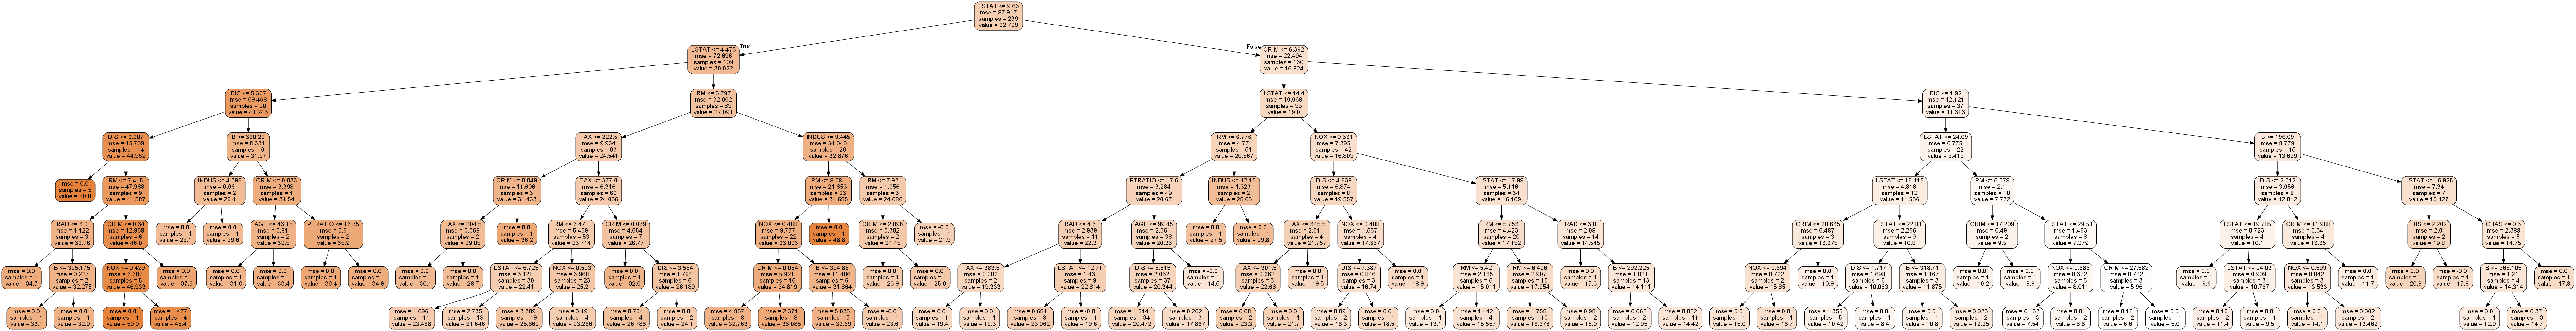

In [22]:
display(Image(graph.create_png()))

# 特征重要度分析

In [8]:
rf_reg.feature_importances_

array([4.88037712e-02, 4.38907712e-04, 7.86618812e-03, 3.56268898e-04,
       2.54355293e-02, 3.84229160e-01, 1.07031872e-02, 4.86748329e-02,
       6.28984777e-03, 1.52636136e-02, 2.87098350e-02, 8.08575740e-03,
       4.15143100e-01])

In [9]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
import numpy as np
print('特征排序：')
feature_names= X.columns
feature_importances = rf_reg.feature_importances_
indices = np.argsort(feature_importances)[::-1]

for index in indices:
    print("feature %s (%f)" %(feature_names[index], feature_importances[index]))

特征排序：
feature LSTAT (0.415143)
feature RM (0.384229)
feature CRIM (0.048804)
feature DIS (0.048675)
feature PTRATIO (0.028710)
feature NOX (0.025436)
feature TAX (0.015264)
feature AGE (0.010703)
feature B (0.008086)
feature INDUS (0.007866)
feature RAD (0.006290)
feature ZN (0.000439)
feature CHAS (0.000356)


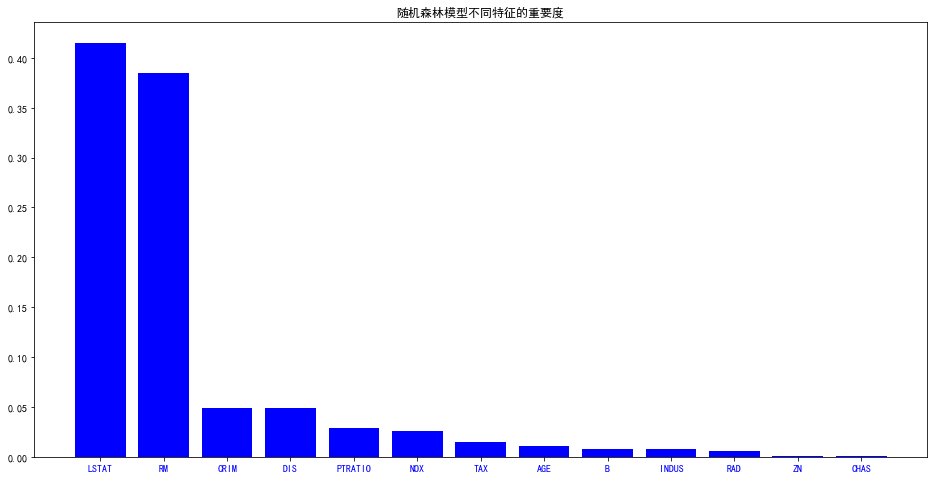

In [11]:
plt.figure(figsize=(16,8))
plt.title("随机森林模型不同特征的重要度")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')
plt.show()

换成中文

In [12]:
import pandas as pd
df = pd.read_csv('boston_house_price_Chinese.csv',encoding='gbk')
feature_names = df.columns

In [13]:
feature_names

Index(['犯罪率', '住宅用地所占比例', '城镇中非商业用地所占比例', '是否处于查尔斯河边', '一氧化氮浓度', '住宅房间数',
       '1940年以前建成的业主自住单位的占比', '距离波士顿5个商业中心的加权平均距离', '距离高速公路的便利指数', '不动产税率',
       '学生/教师比例', '黑人比例', '低收入阶层占比', '房价中位数'],
      dtype='object')

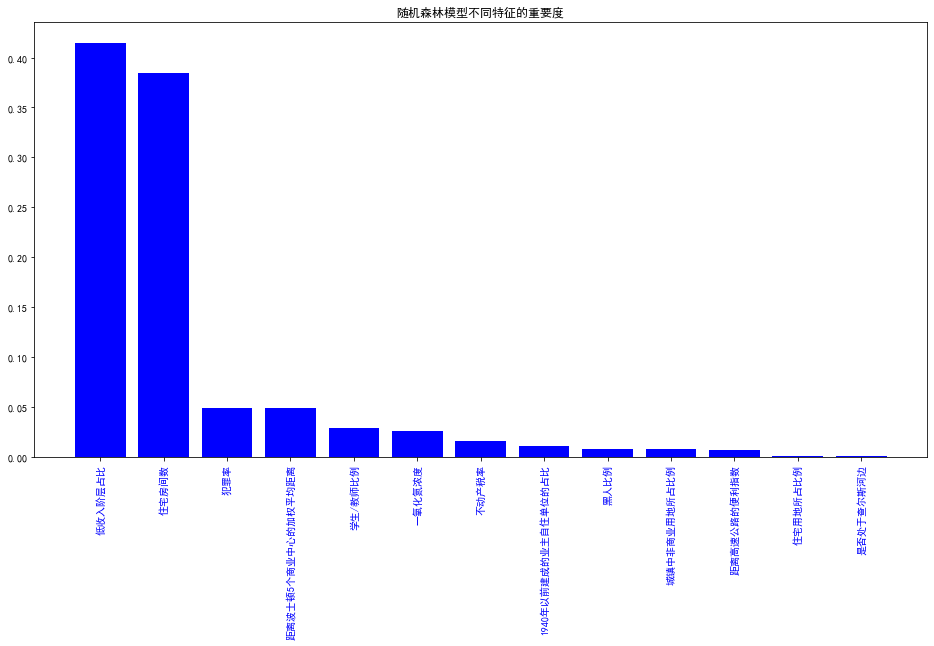

In [15]:
plt.figure(figsize=(16,8))
plt.title("随机森林模型不同特征的重要度")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')
plt.xticks(rotation=90)
plt.show()

# 可视化测试集上的回归预测结果

In [16]:
result = {"label":y_test,"prediction":rf_reg.predict(x_test)}
result = pd.DataFrame(result)

In [17]:
result.head()

,label,prediction
329,22.6,24.911091
371,50.0,31.647000
219,23.0,21.652545
403,8.3,9.656689
78,21.2,20.923231


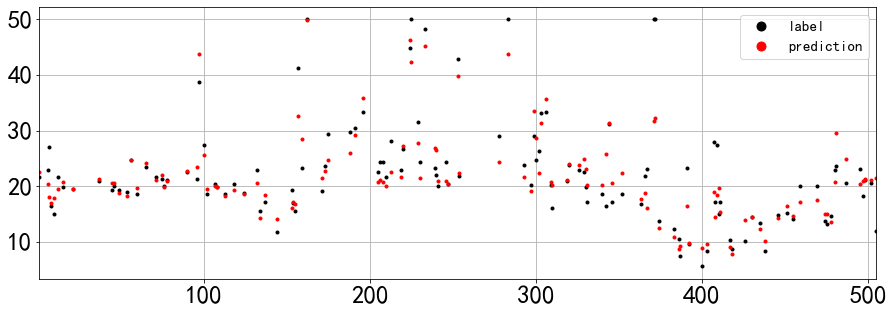

In [18]:
result['label'].plot(style='k.', figsize=(15,5))
result['prediction'].plot(style='r.')
# 设置图例文字大小和图示大小
plt.legend(fontsize=15,markerscale=3)
# 设置坐标文字大小
plt.tick_params(labelsize=25)
# 生成刻度线网格
plt.grid()

# 计算MSE均方误差和RMSE均方根误差

In [19]:
from sklearn import metrics

In [20]:
MSE = metrics.mean_squared_error(y, rf_reg.predict(X))

In [21]:
MSE

6.087115296174916

In [22]:
np.sqrt(MSE)

2.46720799613144

# 提交结果

In [23]:
submission = {"prediction":rf_reg.predict(x_test)}
submission = pd.DataFrame(submission)

In [24]:
submission.head()

,prediction
0,24.911091
1,31.647000
2,21.652545
3,9.656689
4,20.923231


In [25]:
submission.to_csv('数据提交.csv')